In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)


In [3]:
df=pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.shape

(1087, 56)

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [8]:
df[['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean']]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2

In [11]:
df=df.drop(['Length', 'Speed', 'Opening date',
       'Type', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'height_value', 'height_unit',], axis=1).copy()

In [12]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [16]:
#change "opening_date_clean" to a date-time column
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [17]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

#### Lets try to rename the columns for easier recognition

In [18]:
#first call the columns
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [21]:
df.rename(columns={'coaster_name':'Coaster_Name', 
                   'year_introduced':'Year_Introduced',
                   'latitude':'Latitude','longitude':'Longitude',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph','height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [22]:
df=df.rename(columns={'coaster_name':'Coaster_Name', 
                   'year_introduced':'Year_Introduced',
                   'latitude':'Latitude','longitude':'Longitude',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph','height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [23]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


#### Working On missing values

In [27]:
#checking the sum of null values per column
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [29]:
#check for duplicated data
df.duplicated().sum()

0

In [30]:
df.duplicated(subset=['Coaster_Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [32]:
#checking a sample duplicate 
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [35]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [37]:
df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [38]:
#the new dataframe
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [39]:
df.shape

(990, 13)

### Understanding The Features

#### Univariate analysis.

In [41]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Number of Coasters Introduced')

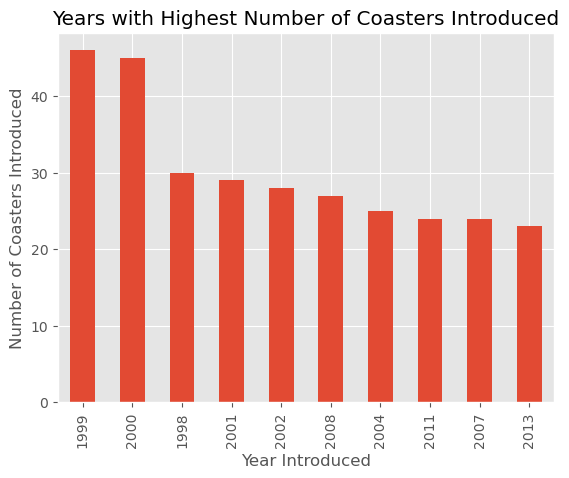

In [47]:
ax=df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Years with Highest Number of Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Number of Coasters Introduced')

Text(0.5, 0, 'Speed (mph)')

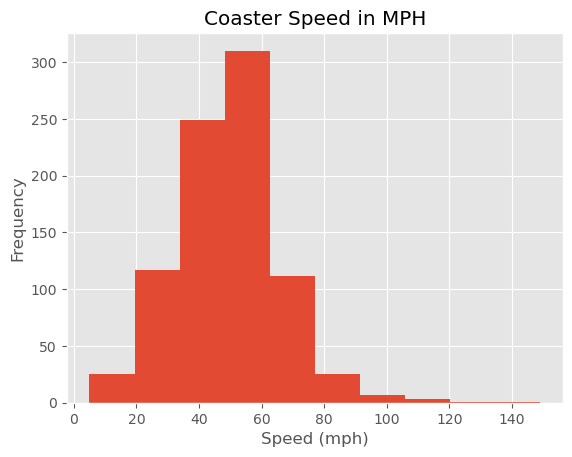

In [52]:
ax=df['Speed_mph'].plot(kind='hist',
                        bins=10,
                        title='Coaster Speed in MPH')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

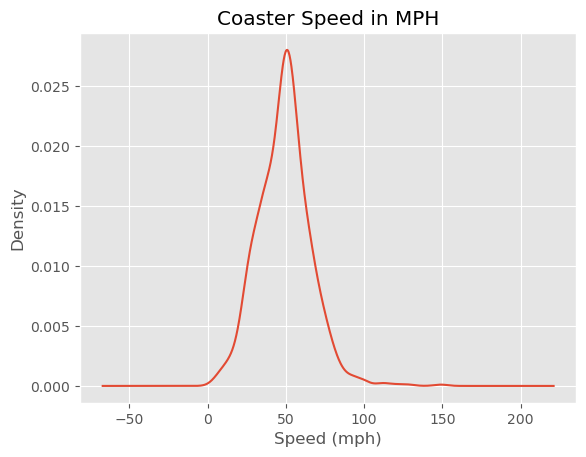

In [55]:
ax=df['Speed_mph'].plot(kind='kde',  
                        title='Coaster Speed in MPH')
ax.set_xlabel('Speed (mph)')

### How The Different Features Relate to Each Other.

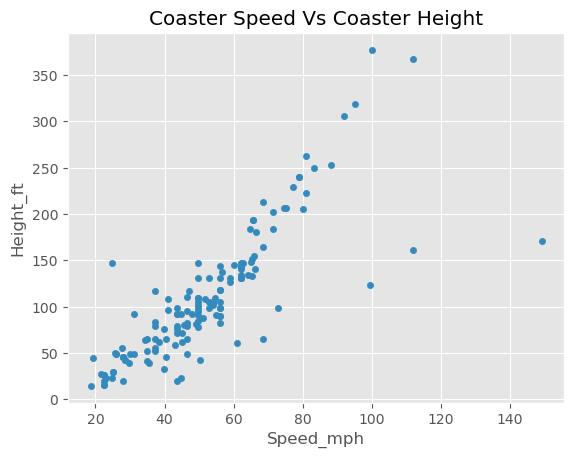

In [57]:
df.plot(kind='scatter', 
        x='Speed_mph', 
        y='Height_ft', 
        title='Coaster Speed Vs Coaster Height')
plt.show()

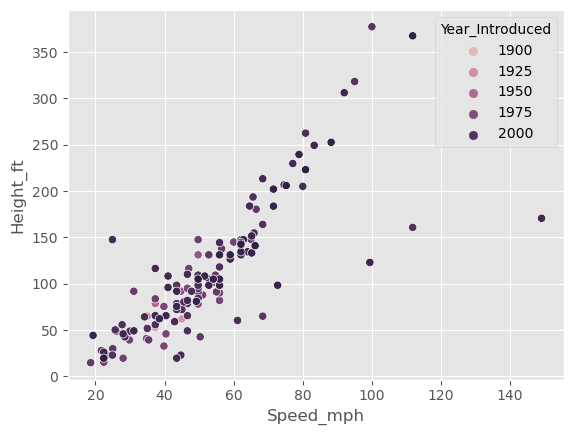

In [60]:
sns.scatterplot(data=df, y='Height_ft', 
                x='Speed_mph', 
                hue='Year_Introduced', markers=False)
plt.show()

### Comparing Multiple Features
#### Using pairplot from seaborn

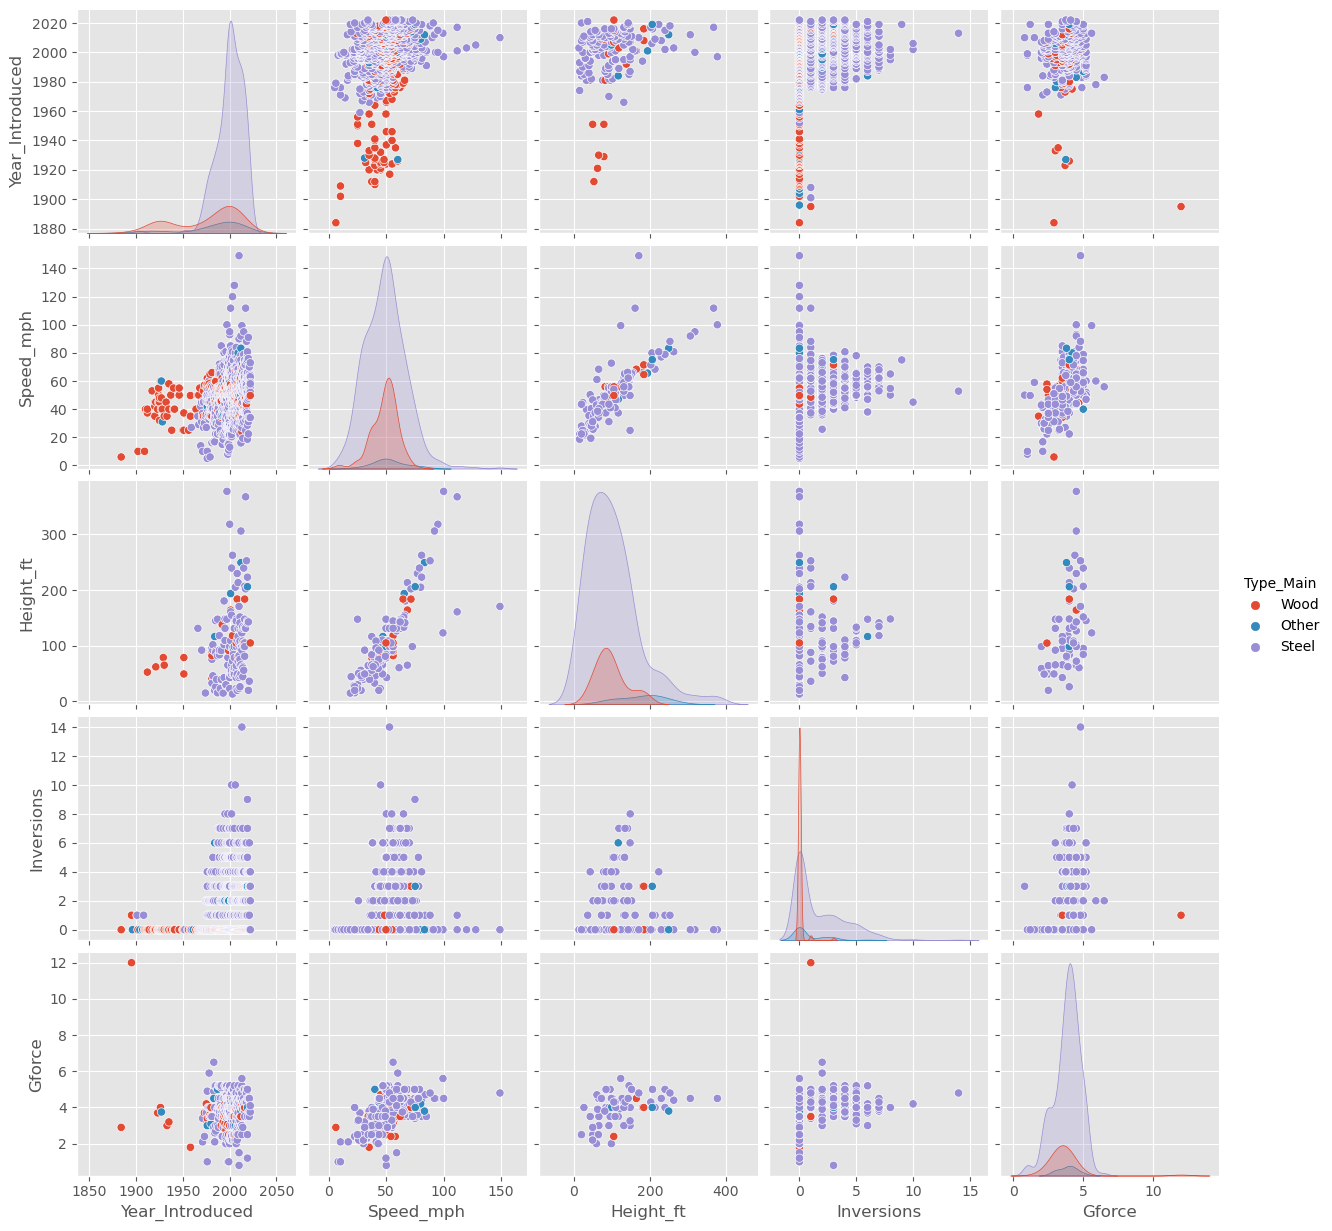

In [63]:
sns.pairplot(df,vars=['Year_Introduced', 'Speed_mph','Height_ft','Inversions','Gforce'], hue='Type_Main')
plt.show()

#### Using Correlation to Check the Relationship Between Feature

In [67]:
df_corr=df[['Year_Introduced', 
            'Speed_mph','Height_ft',
            'Inversions','Gforce']].dropna().corr()

df.corr()

,Year_Introduced,Latitude,Longitude,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,-0.069354,0.178767,0.225991,0.249487,0.233701,-0.073403
Latitude,-0.069354,1.000000,-0.297532,-0.056193,0.020147,-0.000506,0.055499
Longitude,0.178767,-0.297532,1.000000,0.054283,0.129088,0.080824,0.017657
Speed_mph,0.225991,-0.056193,0.054283,1.000000,0.823216,0.246593,0.503828
Height_ft,0.249487,0.020147,0.129088,0.823216,1.000000,0.138286,0.480465
Inversions,0.233701,-0.000506,0.080824,0.246593,0.138286,1.000000,0.339137
Gforce,-0.073403,0.055499,0.017657,0.503828,0.480465,0.339137,1.000000


### Use A Heatmap to Show Well the Features are Correlatied


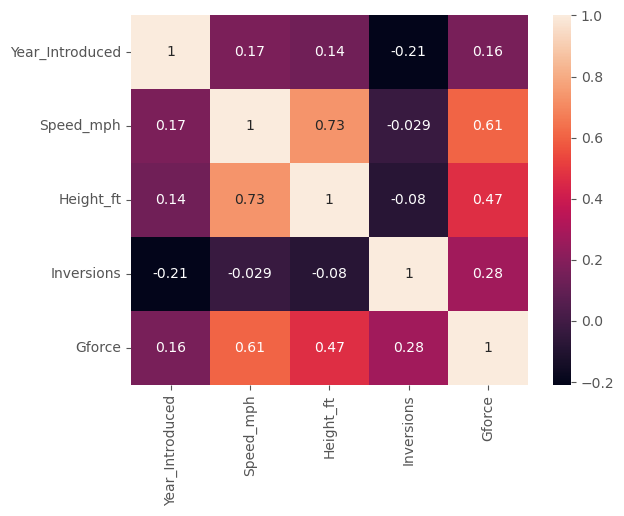

In [70]:
sns.heatmap(df_corr,annot=True,)
plt.show()

## Answering Some questions with the Data

#### What Locations, with a minimum of 10 coasters, have the fastest Roller Coasters?

In [72]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [73]:
df.query('Location != "other"').groupby('Location')['Speed_mph'].agg(['mean','count'])

,mean,count
Location,,
"2904 Fantasy Way Myrtle Beach, South Carolina, U.S.",NaN,0
"63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.",NaN,0
"8039 Beach BoulevardBuena Park, California 90620, U.S.",NaN,0
Adlabs Imagica,42.50,1
Adventure City,31.10,1
...,...,...
Xishuangbanna Theme Park,52.80,1
Yomiuriland,51.45,4
ZDT's Amusement Park,40.40,1


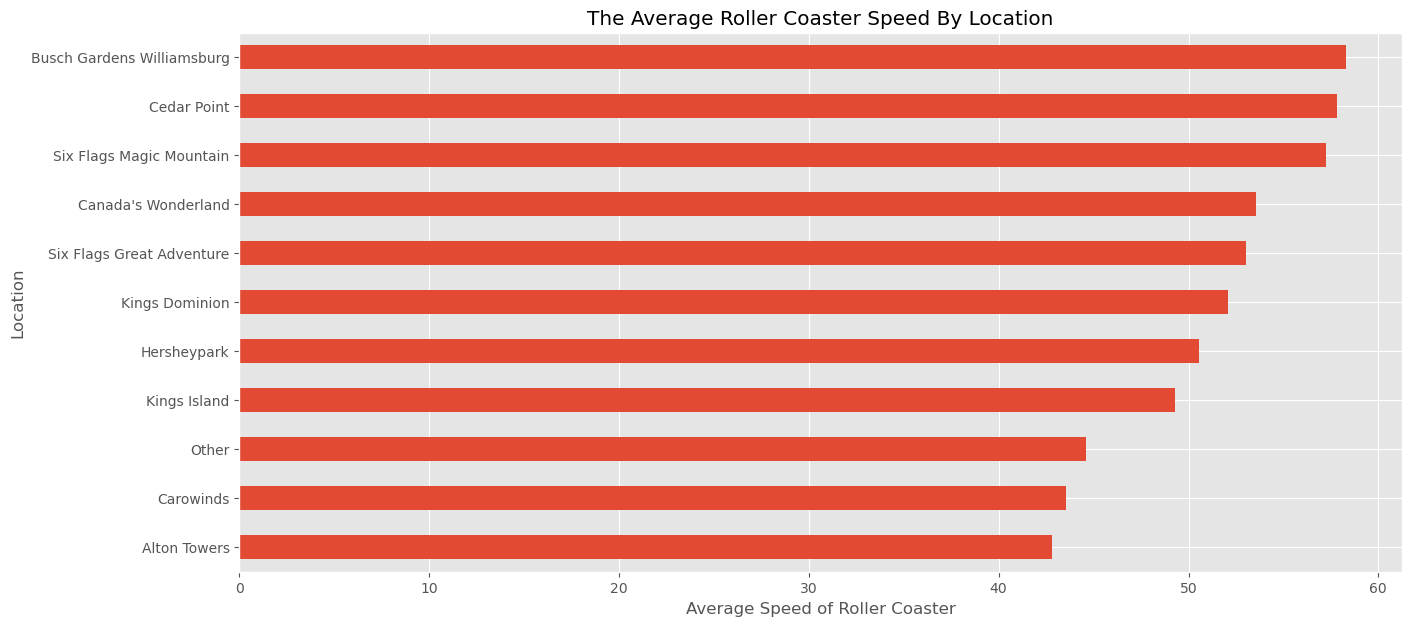

In [79]:
ax=df.query('Location != "other"').groupby('Location')['Speed_mph'].agg(['mean','count']) \
    .query('count >=10').sort_values('mean') \
    ['mean'].plot(kind='barh', figsize=(15,7), title='The Average Roller Coaster Speed By Location')
ax.set_xlabel('Average Speed of Roller Coaster')
plt.show()